# <center>Deep learning approach</center>

In this section we'll build a deep learning model that classify the shapes with higher accuracy. 

We'll be using the `transfer learning` technique where we'll use a pre-trained CNN model and re-train it with our data.

In [1]:
import os
images_dir_path = '../newdata/imgs'
files_name = os.listdir(images_dir_path)

In [2]:
files_name[:8] # The first 8 images

['0_bicycle.png',
 '0_car.png',
 '0_clock.png',
 '0_fish.png',
 '0_guitar.png',
 '0_house.png',
 '0_pencil.png',
 '0_tree.png']

### Importing the Dependencies

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from google.colab.patches import cv2_imshow 
import cv2
import glob
import json

Displaying some images from the dataset

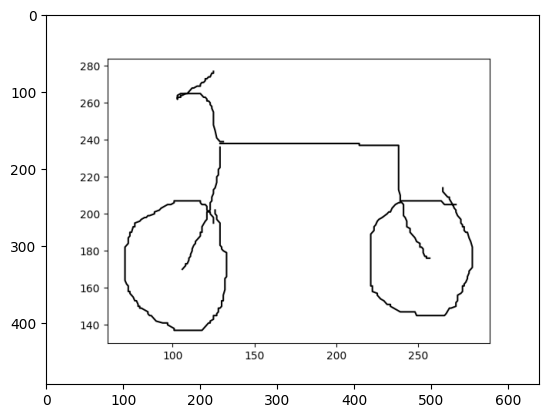

In [4]:
img = mpimg.imread(images_dir_path +'\\'+ files_name[0])
imgplot = plt.imshow(img)
plt.show()

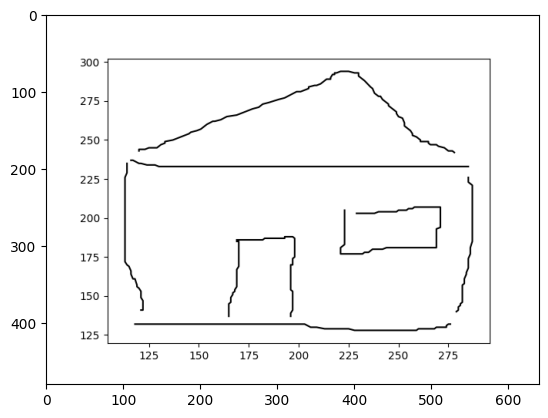

In [5]:
img = mpimg.imread(images_dir_path +'\\'+ files_name[5])
imgplot = plt.imshow(img)
plt.show()

Let's count the number of each shape image in the dataset

In [6]:
count_dict ={
    'bicycle': 0,
    'car': 0,
    'clock': 0,
    'fish': 0,
    'guitar': 0,
    'house': 0,
    'pencil': 0,
    'tree': 0
}

In [7]:
imgs = glob.glob('../newdata/imgs/*')
for i in range(len(imgs)):
    img_type = imgs[i].split('\\')[1].split('.')[0].split('_')[1]
    count_dict[imgs[i].split('\\')[1].split('.')[0].split('_')[1]] += 1
count_dict

{'bicycle': 716,
 'car': 716,
 'clock': 716,
 'fish': 716,
 'guitar': 716,
 'house': 715,
 'pencil': 716,
 'tree': 716}

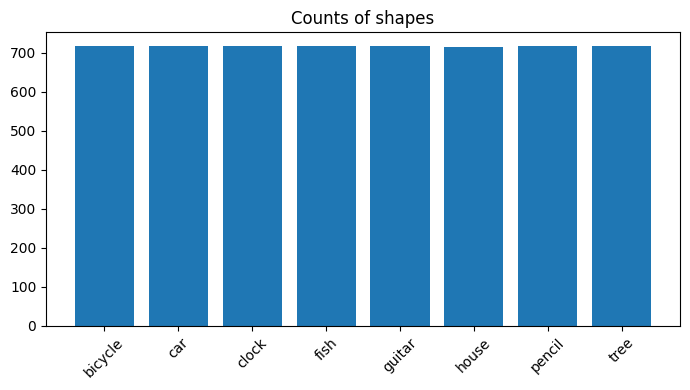

In [8]:
plt.figure(figsize=(7, 4))
plt.bar(count_dict.keys(), count_dict.values())
plt.title('Counts of shapes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have some problems here. We have to eliminate the axis of the image as it's shown in the plot.

So we have to crop the images. But befor that, we have to clean the images; i.e. deleting the wrong images. And at the end, we have to resize the images to the same size.

I know that we've some some cleaning earlier in the `Machine learning approach` in [this Notebook](../ML_approach/Data_cleaning.ipynb) but we just deleted the wrong json files and not the images saved after the plot.

### 1- Handling the wrong images

as we have already deleted the wrong json data from the dataset. Now, all we need is to loop through the remaining json files and save their plots as images, and we'll get a clean data.

In [16]:
files = '../newdata/json/*'
for j,file in enumerate(glob.glob(files)):
    
    with open(file,'r') as f:
        d = json.load(f)
        print(f"Session : {d['session']}")
        drawings=['bicycle','car','clock','fish','guitar','house','pencil','tree']
        for draw in drawings:
            
            try:
                fig, ax = plt.subplots()
                for path in d['drawings'][draw]:
                    path = np.array(path)
                    ax.plot(path[:, 0], 400-path[:,1], color='k')
                fig.savefig(f"../newdata/clean_imgs/{d['session']}_{draw}.png")
                plt.close(fig)
            except:
                print(f"{draw} in session {d['session']} doesn't exist")
        # if j == 4 : break

Session : 0
Session : 1
Session : 10


Session : 100
bicycle in session 100 doesn't exist
car in session 100 doesn't exist
fish in session 100 doesn't exist
house in session 100 doesn't exist
tree in session 100 doesn't exist
Session : 101
Session : 102
Session : 103
Session : 104
Session : 105
Session : 106
Session : 107
Session : 108
Session : 109
Session : 11
Session : 110
car in session 110 doesn't exist
Session : 111
fish in session 111 doesn't exist
pencil in session 111 doesn't exist
Session : 112
Session : 113
Session : 114
Session : 115
Session : 116
clock in session 116 doesn't exist
Session : 117
Session : 118
Session : 119
Session : 12
guitar in session 12 doesn't exist
pencil in session 12 doesn't exist
Session : 120
Session : 121
Session : 122
tree in session 122 doesn't exist
Session : 123
Session : 124
Session : 125
Session : 126
Session : 127
Session : 128
Session : 129
Session : 13
Session : 130
Session : 131
Session : 132
Session : 133
Session : 134
Session : 135
Session : 136
Session : 137
Session : 138


Let's see the number of each image type in the dataset after cleaning the data

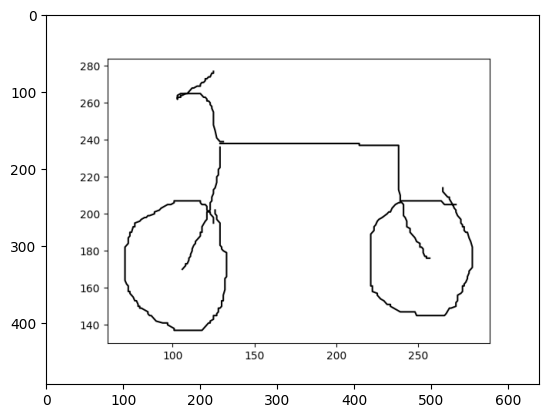

In [9]:
clean_images = glob.glob('../newdata/clean_imgs/*')
img = mpimg.imread(clean_images[0])
imgplot = plt.imshow(img)
plt.show()

In [10]:
count_dict2 ={
    'bicycle': 0,
    'car': 0,
    'clock': 0,
    'fish': 0,
    'guitar': 0,
    'house': 0,
    'pencil': 0,
    'tree': 0
}
for i in range(len(clean_images)):
    img_type = clean_images[i].split('\\')[1].split('.')[0].split('_')[1]
    count_dict2[clean_images[i].split('\\')[1].split('.')[0].split('_')[1]] += 1

In [11]:
count_dict2

{'bicycle': 692,
 'car': 689,
 'clock': 690,
 'fish': 686,
 'guitar': 692,
 'house': 689,
 'pencil': 675,
 'tree': 694}

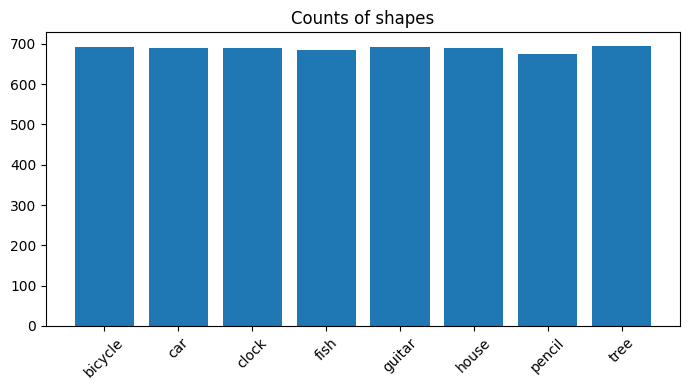

In [12]:
plt.figure(figsize=(7, 4))
plt.bar(count_dict2.keys(), count_dict2.values())
plt.title('Counts of shapes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2- Cropping the images

In this section and as mentioned before, the images contains axis that we have to eliminate. So we have to crop the images to get rid of them.

In [13]:
imgs = glob.glob('../newdata/clean_imgs/*')
no_imgs = len(imgs)
for i in range(no_imgs):
    image_filename = imgs[i].split('\\')[1] # we take just the name of the file with its extension
    
    print(image_filename, end='--') # Just to track if any error occurs, we can easily know the image that causes the error
    
    img = Image.open(imgs[i])
    width, height = img.size

    left = 80
    upper = 60
    right = width - 80
    lower = height - 60

    # Crop the image
    cropped_img = img.crop((left, upper, right, lower))

    # Save the cropped image
    cropped_img.save('../newdata/clean_imgs_crop/'+ image_filename)

0_bicycle.png--0_car.png--0_clock.png--0_fish.png--0_guitar.png--0_house.png--0_pencil.png--0_tree.png--100_clock.png--100_guitar.png--100_pencil.png--101_bicycle.png--101_car.png--101_clock.png--101_fish.png--101_guitar.png--101_house.png--101_pencil.png--101_tree.png--102_bicycle.png--102_car.png--102_clock.png--102_fish.png--102_guitar.png--102_house.png--102_pencil.png--102_tree.png--103_bicycle.png--103_car.png--103_clock.png--103_fish.png--103_guitar.png--103_house.png--103_pencil.png--103_tree.png--104_bicycle.png--104_car.png--104_clock.png--104_fish.png--104_guitar.png--104_house.png--104_pencil.png--104_tree.png--105_bicycle.png--105_car.png--105_clock.png--105_fish.png--105_guitar.png--105_house.png--105_pencil.png--105_tree.png--106_bicycle.png--106_car.png--106_clock.png--106_fish.png--106_guitar.png--106_house.png--106_pencil.png--106_tree.png--107_bicycle.png--107_car.png--107_clock.png--107_fish.png--107_guitar.png--107_house.png--107_pencil.png--107_tree.png--108_bicyc

KeyboardInterrupt: 

Let's dispaly some of the new images after being cropped.

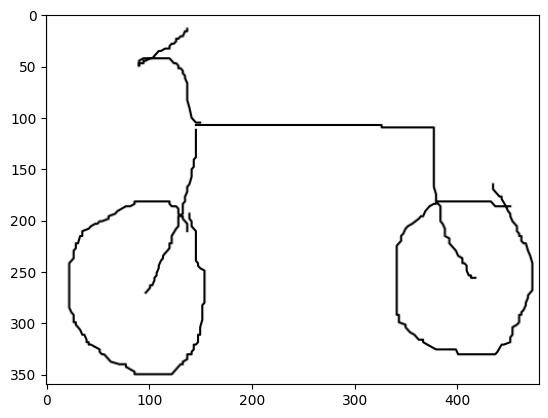

In [14]:
cropped_images = glob.glob('../newdata/clean_imgs_crop/*')
img = mpimg.imread(cropped_images[0])
imgplot = plt.imshow(img)
plt.show()

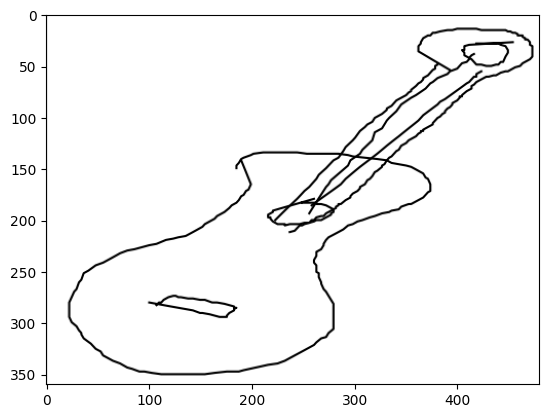

In [15]:
cropped_images = glob.glob('../newdata/clean_imgs_crop/*')
img = mpimg.imread(cropped_images[15])
imgplot = plt.imshow(img)
plt.show()

as we see now, there is no more axis in the images

### 3- Resizing the images

As mentioned on top, we'll be using a pre-trained model and so we have to respect its properties defined when it's trained. 

And the most important one is the size of the images that it was been trained with. In our case, we need a `224x224 pixels` images.

In [17]:
# Create a directory/folder that will contain all the the resized images
try:
    os.mkdir('../newdata/resized_clean_imgs_crop')
except:
    print("Dir already exist")

Dir already exist


In [18]:
images_folder = '../newdata/clean_imgs_crop'
resized_folder = '../newdata/resized_clean_imgs_crop'
images = glob.glob(images_folder + '/*') # this variable will contain all paths of the images

In [ ]:
for i in range(len(images)):
    image = images[i]

    img = Image.open(image)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    path_where_to_save = resized_folder + '/' + image.split('\\')[-1]
    img.save(path_where_to_save)

Now let's display some of the resized images

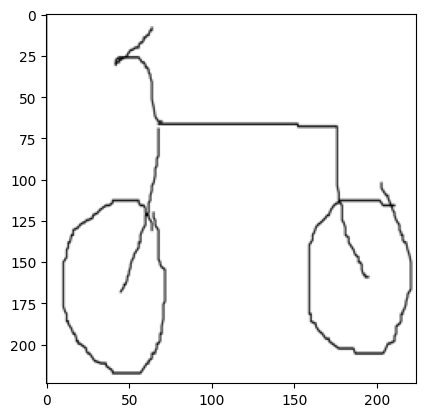

In [19]:
img = mpimg.imread(glob.glob(resized_folder+'/*')[0])
imgplt = plt.imshow(img)
plt.show()

### 4- Converting the images to numpy arrays

In order to feed the model, we need to convert the image data into arrays.

In [20]:
resized_images = glob.glob(resized_folder + '/*')
resized_images[:3]

['../newdata/resized_clean_imgs_crop\\0_bicycle.png',
 '../newdata/resized_clean_imgs_crop\\0_car.png',
 '../newdata/resized_clean_imgs_crop\\0_clock.png']

In [21]:
array_of_images = np.asarray([cv2.imread(image) for image in resized_images])

In [22]:
len(array_of_images),array_of_images[0]

(5507,
 array([[[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 2

In [23]:
print(array_of_images.shape)

(5507, 224, 224, 3)


### 5- Labeling the images

In [24]:
shape_dict = {
    'car': 0,
    'fish': 1,
    'clock': 2,
    'house': 3,
    'tree': 4,
    'guitar': 5,
    'pencil': 6,
    'bicycle': 7
}

In [25]:
labels = []
for i in range(len(resized_images)):
    image_shape = resized_images[i].split('\\')[1].split('.')[0].split('_')[1]
    labels.append(shape_dict[image_shape])
labels[:15]

[7, 0, 2, 1, 5, 3, 6, 4, 2, 5, 6, 7, 0, 2, 1]

In [26]:
X = array_of_images
y = np.asarray(labels)

### 6- Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(5507, 224, 224, 3) (4405, 224, 224, 3) (1102, 224, 224, 3)


### 7- Scaling the images

In our case, as we know that images are represented by a matrix of pixels, we have to scale the pixels to be between 0 and 1. So we'll divide all the pixels by 255, because each pixel is represented by a number between 0 and 255.

In [29]:
X_train_scaled = X_train /255
X_test_scaled = X_test /255

In [30]:
X

array([[[[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[140, 140, 140],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [31]:
X_train_scaled

array([[[[0.54901961, 0.54901961, 0.54901961],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.54901961, 0.54901961, 0.54901961],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.54901961, 0.54901961, 0.54901961],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.54901961, 0.54901961, 0.54901961],
         [1.        , 1.        , 1.        ]

### 8- Building the Model

In [47]:
%pip install tensorflow-hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB ? eta -:--:--
   --- ------------------------------------ 0.2/1.7 MB 2.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 1.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.7 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.7 MB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.7 MB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 1.3 MB/s eta 0:00:01
   ----------------- -----

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

We'll be using MobileNetV2 model as it's a pre-trained model and it's very fast and accurate. We'll re-train the model on our dataset.

<img alt="MobilenetV2" src="../imgs_for_notebooks/mobilenetv2.png" >

In [33]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [34]:
pretrained_model

In [35]:
num_of_classes = 8

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 2268232 (8.65 MB)
Trainable params: 10248 (40.03 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [37]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10



138/138 [==============================] - 44s 272ms/step - loss: 0.7725 - acc: 0.7716
Epoch 2/10
138/138 [==============================] - 37s 265ms/step - loss: 0.3372 - acc: 0.9137
Epoch 3/10
138/138 [==============================] - 34s 245ms/step - loss: 0.2675 - acc: 0.9330
Epoch 4/10
138/138 [==============================] - 34s 246ms/step - loss: 0.2245 - acc: 0.9444
Epoch 5/10
138/138 [==============================] - 32s 235ms/step - loss: 0.2019 - acc: 0.9482
Epoch 6/10
138/138 [==============================] - 33s 238ms/step - loss: 0.1757 - acc: 0.9578
Epoch 7/10
138/138 [==============================] - 33s 237ms/step - loss: 0.1583 - acc: 0.9653
Epoch 8/10
138/138 [==============================] - 33s 237ms/step - loss: 0.1471 - acc: 0.9659
Epoch 9/10
138/138 [==============================] - 35s 252ms/step - loss: 0.1334 - acc: 0.9700
Epoch 10/10
138/138 [==============================] - 33s 236ms/step - loss: 0.1196 - acc: 0.9743


In [38]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

35/35 [==============================] - 9s 228ms/step - loss: 0.2909 - acc: 0.9283
Test Loss = 0.2909437417984009
Test Accuracy = 0.9283121824264526


### And finally, We reached a `92%` accuracy on the test data compared to the 61% that we've reached on the machine learning approach.

### 9- Predicting System

It's a simple function that takes an image path and returns the predicted shape. Just to test the model.

In [39]:
prediction_dict = {
    0: 'car',
    1: 'fish',
    2: 'clock',
    3: 'house',
    4: 'tree',
    5: 'guitar',
    6: 'pencil',
    7: 'bicycle'
}

In [46]:
imgs_paths = ['dar.png', 'chajra.png', 'chajra2.png','guitar.jpg','pencil.png']

These are the images that we'll use to test the model

# dar : <img alt="dar" src="../imgs_for_notebooks/dar.png" width=200>

# chajra : <img alt="chajra" src="../imgs_for_notebooks/chajra.png" width=200>

# chajra2 : <img alt="chajra2" src="../imgs_for_notebooks/chajra2.png" width=200>

# guitar : <img alt="guitar" src="../imgs_for_notebooks/guitar.jpg" width=200>

# pencil : <img alt="pencil" src="../imgs_for_notebooks/pencil.png" width=200>


In [47]:
# input_image_path = input('Path of the image to be predicted: ')
for image in imgs_paths:
    input_image_path = f"../imgs_for_notebooks/{image}"

    input_image = cv2.imread(input_image_path)

    # Check if the image is loaded successfully
    if input_image is not None:
        cv2.imshow('Input Image', input_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print('Error loading image. Please check the path.')

    input_image_resize = cv2.resize(input_image, (224,224))

    input_image_scaled = input_image_resize/255
 
    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print(f"image name: {image}")
    print("this is a : " + prediction_dict[input_pred_label])

1/1 [==============================] - 0s 77ms/step
[[ -3.6015494  -7.256677   -2.9120507   6.322018   -7.453319   -6.864274
   -3.1959593 -10.39588  ]]
image name: dar.png
this is a : house
1/1 [==============================] - 0s 87ms/step
[[-12.187615   -6.367797   -2.1122632  -8.389587    4.586054   -7.1828685
   -6.8165746  -9.76494  ]]
image name: chajra.png
this is a : tree
1/1 [==============================] - 0s 71ms/step
[[-4.410783   -2.5013971  -4.1905     -3.2316587   4.378258    0.20909439
  -3.4811099  -6.135165  ]]
image name: chajra2.png
this is a : tree
1/1 [==============================] - 0s 79ms/step
[[-2.737916  -3.5103939 -1.7530003 -6.536331  -5.72108    1.294912
  -2.5384905 -1.2169075]]
image name: guitar.jpg
this is a : guitar
1/1 [==============================] - 0s 61ms/step
[[-1.364064   -9.159962   -4.4682035  -3.5764625  -4.3954616  -3.8513896
   0.75238705 -6.5828323 ]]
image name: pencil.png
this is a : pencil


### So the model predicted all images correctly!

### 10- Saving the model

In [43]:
model.save('the model')

INFO:tensorflow:Assets written to: the model\assets


INFO:tensorflow:Assets written to: the model\assets
